<a href="https://colab.research.google.com/github/ngoc-thach/Final-Project-AI/blob/main/AI_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [4]:
train_d=train_data.flow_from_directory('/content/drive/MyDrive/AI cuối kỳ/train',
                  target_size=(300,300), batch_size=32, class_mode='categorical')

Found 40 images belonging to 2 classes.


In [5]:
train_d.class_indices

{'data1': 0, 'data2': 1}

In [6]:
class1=2

In [7]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(300,300, 3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(class1,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

print("start training")
train=model.fit(train_d,epochs=20,batch_size=128,verbose=1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 300, 300, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 150, 150, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                    

In [8]:
Score=model.evaluate(train_d,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.08593671768903732
Train Accuracy 1.0


In [9]:
model.save("/content/drive/MyDrive/AI cuối kỳ/khuonmat.h5")

In [10]:
model_1=load_model('/content/drive/MyDrive/AI cuối kỳ/khuonmat.h5')

1/1 [==============================] - 0s 287ms/step
Messi


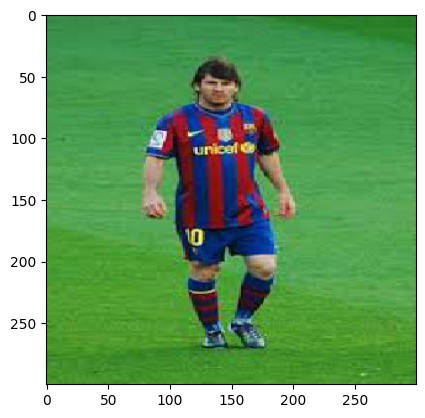

1/1 [==============================] - 0s 36ms/step
Trường Giang


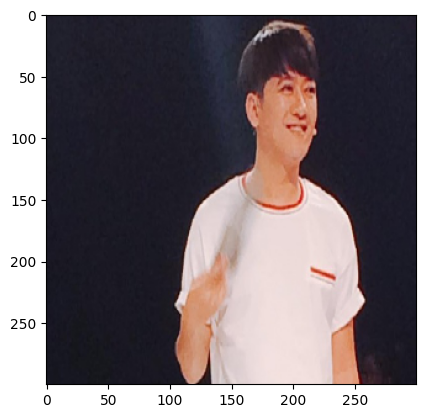

In [11]:
folder="/content/drive/MyDrive/AI cuối kỳ/test/"
for i in os.listdir(folder):
  img=load_img(folder+i,target_size=(300,300))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Messi','Trường Giang']
  print(class_name[result])
  plt.show()